## 14-05-2020

In [1]:
from sklearn.datasets import make_circles

In [2]:
X,y = make_circles(n_samples=1000,noise=.04)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'fig-A')

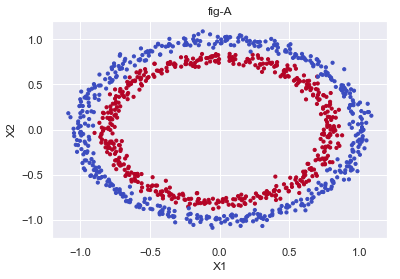

In [17]:
plt.scatter(X[:,0],X[:,1],s=10,c=y,cmap="coolwarm")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("fig-A")

__converting the data to higher degree__<br>
__we can also use polynomialfeature transformer__

In [18]:
n_X = np.square(X)

Text(0.5, 1.0, 'fig-B')

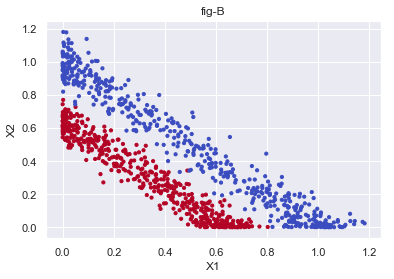

In [22]:
plt.scatter(n_X[:,0],n_X[:,1],s=10,cmap='coolwarm',c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("fig-B")

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

###### Trained model with new tranformed data

In [25]:
lr.fit(n_X,y)

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

* generating data for entire space 

In [26]:
X =n_X

In [27]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [28]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

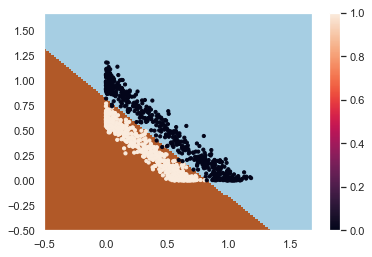

In [31]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10,)
plt.colorbar()

### topics:
* Effects of polynamial transformation 
* impact of outliers
* outliers resistent Linear Models

In [32]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [33]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [34]:
feature_data = house_data[["Sqft","Bedroom"]]

In [35]:
target_data = house_data.Price

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

* __we dont know which form of these features are good for correct prediction__
* _so we have to try it out_

In [38]:
from sklearn.model_selection import train_test_split


* __Trying these one with degree 1,that means we are not deriving new features from the existing ones__ 

In [43]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)


In [44]:
lr.fit(trainX, trainY)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lr.score(testX,testY)

0.6593821100591317

* __Trying for two degree 2 features__

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pol = PolynomialFeatures(degree=2)

In [54]:
feature_data_n = pol.fit_transform(feature_data)

In [55]:
trainX, testX, trainY, testY = train_test_split(feature_data_n, target_data)

In [56]:
lr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lr.score(testX,testY)

0.6974760671951488

* __better way to do these__

In [58]:
for deg in range(1,6):
    pol = PolynomialFeatures(degree=deg)
    feature_data_n = pol.fit_transform(feature_data)
    trainX, testX, trainY, testY = train_test_split(feature_data_n, target_data)
    lr = LinearRegression()
    lr.fit(trainX, trainY)
    print ('Degree ', deg, 'Train Acc', np.round(lr.score(trainX,trainY),2))
    print ('Degree ', deg, 'Test Acc', np.round(lr.score(testX,testY),2))
    print ('---------------------------------')

Degree  1 Train Acc 0.68
Degree  1 Test Acc 0.69
---------------------------------
Degree  2 Train Acc 0.66
Degree  2 Test Acc 0.74
---------------------------------
Degree  3 Train Acc 0.74
Degree  3 Test Acc 0.6
---------------------------------
Degree  4 Train Acc 0.73
Degree  4 Test Acc -4.4
---------------------------------
Degree  5 Train Acc 0.75
Degree  5 Test Acc 0.58
---------------------------------


* _Adding more features_

In [61]:
feature_data =  house_data[['Sqft','Bedroom','Floor','Living.Room']]
for deg in range(1,6):
    pol = PolynomialFeatures(degree=deg)
    feature_data_n = pol.fit_transform(feature_data)
    trainX, testX, trainY, testY = train_test_split(feature_data_n, target_data)
    lr = LinearRegression()
    lr.fit(trainX, trainY)
    print ('Degree ', deg, 'Train Acc', np.round(lr.score(trainX,trainY),2))
    print ('Degree ', deg, 'Test Acc', np.round(lr.score(testX,testY),2))
    print ('-----------------------------')

Degree  1 Train Acc 0.68
Degree  1 Test Acc 0.75
-----------------------------
Degree  2 Train Acc 0.67
Degree  2 Test Acc 0.76
-----------------------------
Degree  3 Train Acc 0.78
Degree  3 Test Acc 0.57
-----------------------------
Degree  4 Train Acc 0.72
Degree  4 Test Acc 0.27
-----------------------------
Degree  5 Train Acc 0.47
Degree  5 Test Acc -54.24
-----------------------------


### Impact of outliers on linear models:
* Out liers are the data that does't fit the general trend

In [65]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=1, n_samples=100, noise=20)

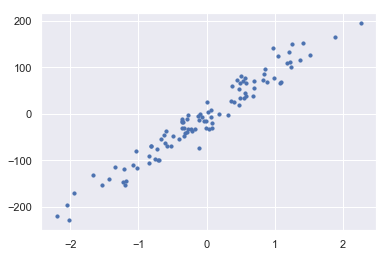

In [66]:
plt.scatter(X,y,s=10)

_add some out liers_

In [67]:
lr = LinearRegression()
lr.fit(X,y)
o_wo = lr.predict(X)

In [68]:
X[:10] = X[:10]+2

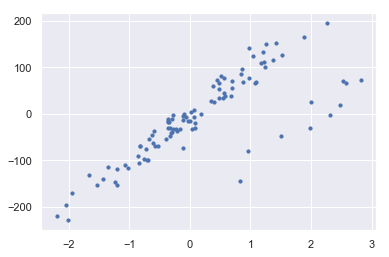

In [69]:
plt.scatter(X,y,s=10)

* __Should ML models be impacted by outliers?__
* _A. ML models should depict general behaviour. A good ML solution will not be impact by outliers._


In [70]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
o = lr.predict(X)

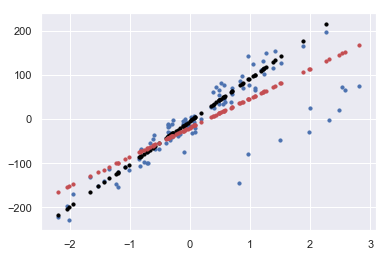

In [73]:
plt.scatter(X,y,s=10)
plt.scatter(X[10:],o_wo[10:],s=10,c='black')
plt.scatter(X,o,s=10,c='r')

### Interview Alert
* __Why does outliers impact linear models?__
* _A. GD will try to find the line in such a way that the cumilative loss is minimal & outliers contribute heavily to the loss_
<hr>

### Dealing with outlier data
* _Filter the data during data cleaning_
* _Using basic statistics to identify that_
* _Advanced Linear models to deal with this_

In [74]:
from sklearn.linear_model import RANSACRegressor

In [75]:
rs_lr = RANSACRegressor()

In [76]:
rs_lr.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [77]:
o_rs = rs_lr.predict(X)

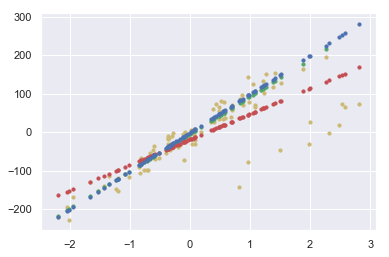

In [81]:
plt.scatter(X,y,s=10,c='y',)
plt.scatter(X[10:],o_wo[10:],s=10,c='g')
plt.scatter(X,o,s=10,c='r')
plt.scatter(X,o_rs,s=10,c='b')

### End